
# PREPROCESSING, MODELLING, AND EVALUATION



In [1]:
import pandas as pd
import numpy as np

import os
import sys

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow
import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential, save_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import pickle

from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
keras.__version__, tensorflow.__version__

('2.15.0', '2.15.0')

## Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ravdess_tess.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,emotion
0,-473.726807,33.173698,-17.385698,-0.075243,-1.283089,-17.614967,-13.460589,-13.664287,-11.909426,-8.961267,...,1.476610e-03,1.601975e-03,1.765140e-03,1.962215e-03,1.531967e-03,6.132264e-04,4.512778e-05,0.208303,0.018460,fear
1,-373.069249,22.536714,-11.681841,0.789297,-0.971270,-14.894454,-9.714550,-9.720900,-9.168260,-7.623753,...,1.565648e-03,1.697445e-03,1.846652e-03,2.094525e-03,1.635350e-03,7.023039e-04,1.435722e-04,0.315159,0.018982,fear
2,-511.773346,55.222755,-26.109015,8.315705,-7.365054,4.229739,-23.183277,-1.212183,-21.199450,-3.040049,...,4.580055e-15,2.902117e-15,2.053877e-15,1.849313e-15,1.800812e-15,1.757135e-15,1.711773e-15,0.154723,0.012504,fear
3,-623.504211,63.976334,10.045710,15.080756,8.768377,-8.761830,-2.344353,-8.567231,-1.198246,-3.792928,...,1.032176e-04,1.244120e-04,1.666992e-04,2.200567e-04,1.954053e-04,1.121086e-04,8.893101e-06,0.255777,0.004600,surprise
4,-477.378490,34.545516,7.276999,9.596466,3.912596,-8.480895,-6.577589,-7.831310,-2.841467,-4.841047,...,1.193559e-04,1.392081e-04,1.830490e-04,2.370544e-04,2.133596e-04,1.297111e-04,2.527350e-05,0.329803,0.004836,surprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,-350.643735,28.055979,10.476386,0.241958,-0.921147,4.200320,-5.218850,-2.550695,-5.860486,-3.125296,...,7.814881e-04,5.997590e-04,4.570802e-04,3.833294e-04,3.344343e-04,2.727996e-04,2.393433e-04,0.233724,0.010101,disgust
12716,-494.632996,96.098373,-7.314944,29.629505,-29.292646,36.112434,-21.017282,17.438564,-20.493046,0.172794,...,1.968641e-11,1.801241e-11,1.676447e-11,1.584339e-11,1.516557e-11,1.470656e-11,1.442751e-11,0.147768,0.006444,disgust
12717,-482.825073,67.488815,10.249881,7.179336,20.330347,5.929828,-16.206848,4.049374,-13.566292,-5.349269,...,1.317765e-04,1.246205e-04,1.069452e-04,7.514983e-05,6.469765e-05,3.639645e-05,2.302733e-06,0.116541,0.009718,disgust
12718,-390.605313,34.385400,8.123973,10.501236,11.373375,1.298856,-11.130549,-0.753905,-8.086596,-9.057501,...,2.158241e-04,2.005738e-04,1.917532e-04,1.634510e-04,1.558476e-04,1.276638e-04,8.696433e-05,0.188505,0.009870,disgust


## Normalisasi dataset menggunakan *StandardScaler*

In [5]:
scaler = StandardScaler()

In [6]:
df_features = df.drop(['emotion'], axis=1)
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,-473.726807,33.173698,-17.385698,-0.075243,-1.283089,-17.614967,-13.460589,-13.664287,-11.909426,-8.961267,...,9.434967e-04,1.476610e-03,1.601975e-03,1.765140e-03,1.962215e-03,1.531967e-03,6.132264e-04,4.512778e-05,0.208303,0.018460
1,-373.069249,22.536714,-11.681841,0.789297,-0.971270,-14.894454,-9.714550,-9.720900,-9.168260,-7.623753,...,1.053148e-03,1.565648e-03,1.697445e-03,1.846652e-03,2.094525e-03,1.635350e-03,7.023039e-04,1.435722e-04,0.315159,0.018982
2,-511.773346,55.222755,-26.109015,8.315705,-7.365054,4.229739,-23.183277,-1.212183,-21.199450,-3.040049,...,1.429176e-14,4.580055e-15,2.902117e-15,2.053877e-15,1.849313e-15,1.800812e-15,1.757135e-15,1.711773e-15,0.154723,0.012504
3,-623.504211,63.976334,10.045710,15.080756,8.768377,-8.761830,-2.344353,-8.567231,-1.198246,-3.792928,...,7.073543e-05,1.032176e-04,1.244120e-04,1.666992e-04,2.200567e-04,1.954053e-04,1.121086e-04,8.893101e-06,0.255777,0.004600
4,-477.378490,34.545516,7.276999,9.596466,3.912596,-8.480895,-6.577589,-7.831310,-2.841467,-4.841047,...,8.672815e-05,1.193559e-04,1.392081e-04,1.830490e-04,2.370544e-04,2.133596e-04,1.297111e-04,2.527350e-05,0.329803,0.004836


In [7]:
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled)
df_features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,-0.259766,-0.762577,-0.980074,-0.845146,0.346132,-1.887999,-0.531573,-1.155032,-0.010714,-1.380175,...,-0.297314,-0.255647,-0.197043,-0.090666,-0.081783,-0.180028,-0.267849,-0.225260,0.255175,-0.159006
1,0.498064,-1.133713,-0.641290,-0.789277,0.372068,-1.652613,-0.058260,-0.735095,0.291712,-1.149787,...,-0.287096,-0.247925,-0.185372,-0.077169,-0.062350,-0.167187,-0.254367,-0.197509,1.471025,-0.130066
2,-0.546211,0.006737,-1.498201,-0.302896,-0.159749,0.002062,-1.760040,0.171011,-1.035662,-0.360243,...,-0.385226,-0.383702,-0.392880,-0.382949,-0.369984,-0.370310,-0.360661,-0.237982,-0.354484,-0.489747
3,-1.387410,0.312159,0.649232,0.134283,1.182184,-1.122003,0.872968,-0.612239,1.171026,-0.489927,...,-0.378635,-0.374751,-0.377671,-0.355346,-0.337663,-0.346039,-0.343694,-0.235475,0.795356,-0.928677
4,-0.287259,-0.714713,0.484783,-0.220129,0.778294,-1.097695,0.338097,-0.533870,0.989733,-0.670466,...,-0.377145,-0.373351,-0.375862,-0.352639,-0.335166,-0.343809,-0.341029,-0.230857,1.637647,-0.915533


### Hasil normalisasi

In [8]:
df2 = pd.concat([df_features_scaled, df['emotion']], axis=1)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,emotion
0,-0.259766,-0.762577,-0.980074,-0.845146,0.346132,-1.887999,-0.531573,-1.155032,-0.010714,-1.380175,...,-0.255647,-0.197043,-0.090666,-0.081783,-0.180028,-0.267849,-0.225260,0.255175,-0.159006,fear
1,0.498064,-1.133713,-0.641290,-0.789277,0.372068,-1.652613,-0.058260,-0.735095,0.291712,-1.149787,...,-0.247925,-0.185372,-0.077169,-0.062350,-0.167187,-0.254367,-0.197509,1.471025,-0.130066,fear
2,-0.546211,0.006737,-1.498201,-0.302896,-0.159749,0.002062,-1.760040,0.171011,-1.035662,-0.360243,...,-0.383702,-0.392880,-0.382949,-0.369984,-0.370310,-0.360661,-0.237982,-0.354484,-0.489747,fear
3,-1.387410,0.312159,0.649232,0.134283,1.182184,-1.122003,0.872968,-0.612239,1.171026,-0.489927,...,-0.374751,-0.377671,-0.355346,-0.337663,-0.346039,-0.343694,-0.235475,0.795356,-0.928677,surprise
4,-0.287259,-0.714713,0.484783,-0.220129,0.778294,-1.097695,0.338097,-0.533870,0.989733,-0.670466,...,-0.373351,-0.375862,-0.352639,-0.335166,-0.343809,-0.341029,-0.230857,1.637647,-0.915533,surprise


In [9]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

## One-hot Encoding pada class dataset

In [ ]:
emo = df2['emotion'].values.reshape(-1,1)
emo

array([['fear'],
       ['fear'],
       ['fear'],
       ...,
       ['disgust'],
       ['disgust'],
       ['disgust']], dtype=object)

In [ ]:
encoder = OneHotEncoder()

emo = encoder.fit_transform(emo).toarray()
emo

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
encoder.categories_

[array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
        'surprise'], dtype=object)]

In [ ]:
pickle.dump(encoder, open('encoder.pkl', 'wb'))

In [ ]:
cat_array = encoder.categories_[0]
cat_array

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise'], dtype=object)

## Train Test Split

### Label/Class


In [ ]:
Y = pd.DataFrame(emo, columns=cat_array)
Y.head()

,angry,calm,disgust,fear,happy,neutral,sad,surprise
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Atribut/fitur

In [ ]:
X = df2.drop(['emotion'], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,-0.259766,-0.762577,-0.980074,-0.845146,0.346132,-1.887999,-0.531573,-1.155032,-0.010714,-1.380175,...,-0.297314,-0.255647,-0.197043,-0.090666,-0.081783,-0.180028,-0.267849,-0.225260,0.255175,-0.159006
1,0.498064,-1.133713,-0.641290,-0.789277,0.372068,-1.652613,-0.058260,-0.735095,0.291712,-1.149787,...,-0.287096,-0.247925,-0.185372,-0.077169,-0.062350,-0.167187,-0.254367,-0.197509,1.471025,-0.130066
2,-0.546211,0.006737,-1.498201,-0.302896,-0.159749,0.002062,-1.760040,0.171011,-1.035662,-0.360243,...,-0.385226,-0.383702,-0.392880,-0.382949,-0.369984,-0.370310,-0.360661,-0.237982,-0.354484,-0.489747
3,-1.387410,0.312159,0.649232,0.134283,1.182184,-1.122003,0.872968,-0.612239,1.171026,-0.489927,...,-0.378635,-0.374751,-0.377671,-0.355346,-0.337663,-0.346039,-0.343694,-0.235475,0.795356,-0.928677
4,-0.287259,-0.714713,0.484783,-0.220129,0.778294,-1.097695,0.338097,-0.533870,0.989733,-0.670466,...,-0.377145,-0.373351,-0.375862,-0.352639,-0.335166,-0.343809,-0.341029,-0.230857,1.637647,-0.915533


### Train test split dengan rasio 7:3

In [ ]:
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, train_size=0.7, random_state=32)

In [ ]:
Y_train.sum()

angry       1244.0
calm         418.0
disgust     1230.0
fear        1264.0
happy       1255.0
neutral     1013.0
sad         1236.0
surprise    1244.0
dtype: float64

In [ ]:
Y_test.sum()

angry       532.0
calm        158.0
disgust     546.0
fear        512.0
happy       521.0
neutral     475.0
sad         540.0
surprise    532.0
dtype: float64

### Expand dimension

Dimensi data harus diubah menjadi 3D agar kompatibel dengan model CNN

In [ ]:
# making our data compatible to model.
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((8904, 182, 1), (8904, 8), (3816, 182, 1), (3816, 8))

## Build model

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

# model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 182, 256)          1536      
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 91, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 91, 128)           163968    
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 46, 128)           0         
 ng1D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 46, 128)           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 46, 128)          

## Train model

In [ ]:
rlrp = ReduceLROnPlateau(
    monitor='loss',
    factor=0.4,
    verbose=0,
    patience=2,
    min_lr=0.0000001
)

history=model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_test, Y_test),
    callbacks=[rlrp],
    validation_split=0.2
    )

Epoch 1/100
140/140 [==============================] - 4s 12ms/step - loss: 1.6490 - accuracy: 0.3649 - val_loss: 1.1595 - val_accuracy: 0.6064 - lr: 0.0010
Epoch 2/100
140/140 [==============================] - 1s 9ms/step - loss: 1.1031 - accuracy: 0.5879 - val_loss: 0.8445 - val_accuracy: 0.7131 - lr: 0.0010
Epoch 3/100
140/140 [==============================] - 1s 10ms/step - loss: 0.9341 - accuracy: 0.6517 - val_loss: 0.7539 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 4/100
140/140 [==============================] - 1s 9ms/step - loss: 0.8258 - accuracy: 0.6947 - val_loss: 0.6601 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 5/100
140/140 [==============================] - 2s 11ms/step - loss: 0.7743 - accuracy: 0.7111 - val_loss: 0.6480 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 6/100
140/140 [==============================] - 2s 12ms/step - loss: 0.7292 - accuracy: 0.7292 - val_loss: 0.6113 - val_accuracy: 0.7731 - lr: 0.0010
Epoch 7/100
140/140 [==============================] - 2s 11

## Hasil training model

120/120 [==============================] - 0s 4ms/step - loss: 0.4124 - accuracy: 0.8622
Accuracy of our model on test data :  86.21593117713928 %


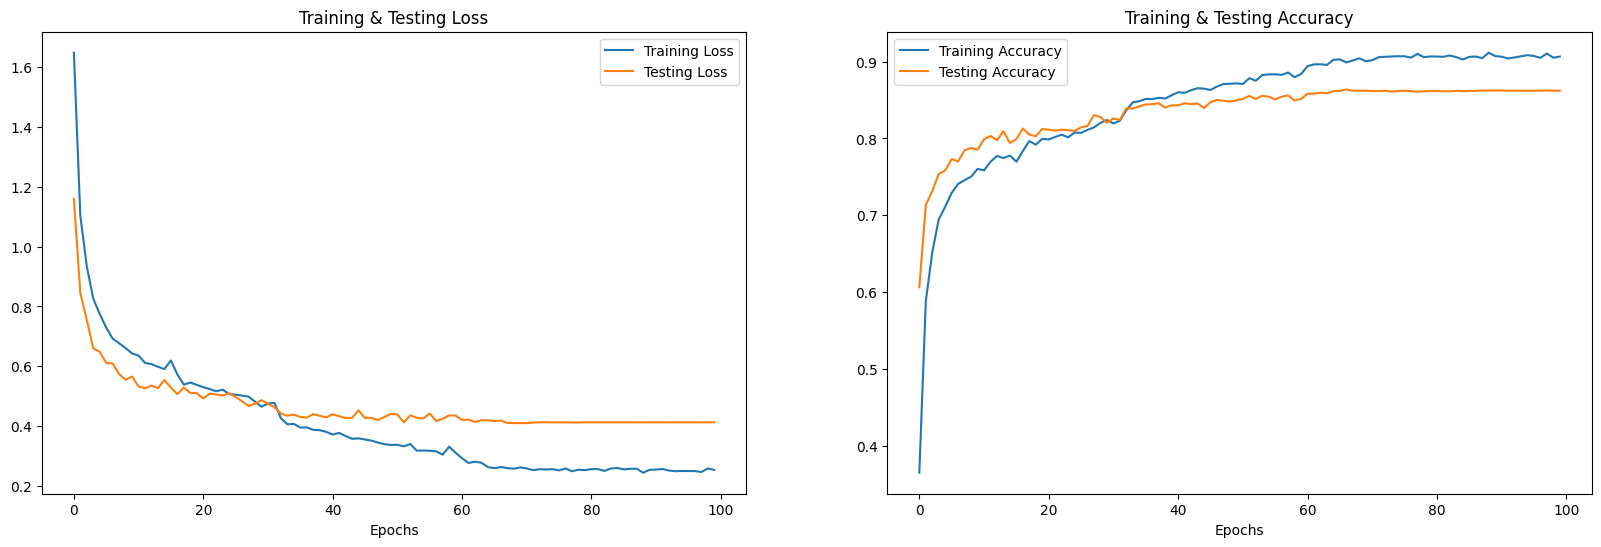

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,Y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

### Export/Save model

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
save_model(model, 'model.h5')

<ipython-input-51-242b5aa1d1a5>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model.h5')


In [ ]:
# save_model(history, 'history.h5')
# pickle.dump(history, open('history.pkl', 'wb'))
with open('history_.pkl', 'wb') as file:
    pickle.dump(history.history, file)

## Prediksi dengan Data test

Mencoba prediksi dengan data baru (X_test)

In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
Y_pred = encoder.inverse_transform(pred_test)

Y_test = encoder.inverse_transform(Y_test)

120/120 [==============================] - 0s 2ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = Y_pred.flatten()
df['Actual Labels'] = Y_test.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,happy,happy
1,surprise,surprise
2,happy,fear
3,angry,angry
4,surprise,surprise
5,happy,happy
6,surprise,surprise
7,surprise,surprise
8,sad,sad
9,disgust,disgust


## Classification report

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       angry       0.94      0.91      0.92       532
        calm       0.52      0.83      0.64       158
     disgust       0.85      0.88      0.87       546
        fear       0.93      0.85      0.89       512
       happy       0.83      0.83      0.83       521
     neutral       0.95      0.85      0.90       475
         sad       0.87      0.85      0.86       540
    surprise       0.85      0.88      0.86       532

    accuracy                           0.86      3816
   macro avg       0.84      0.86      0.85      3816
weighted avg       0.87      0.86      0.87      3816

